In [18]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob as tb
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv('02_PREPROCESSED_APRIL.csv')
df.head()

,tweet,clean_tweet,hastags,attherate,urls,emojis
0,COVID infection leads to clousure of two Jamsh...,COVID infection leads to clousure of two Jamsh...,[],"['@HemantSorenJMM', '@DCEastSinghbhum', '@Bann...",[],[]
1,"UK's Glastonbury Festival, cinemas, museums ge...",UKs Glastonbury Festival cinemas museums get g...,"['#Sipgrab', '#UnitingPeopleWithThePossibiliti...",[],['https://t.co/zsvvfaO49b'],[]
2,These covid lockdowns make me desperate than e...,These covid lockdowns make me desperate than e...,"['#sissyclit', '#ExposedSissySlut', '#sissy', ...",[],['https://t.co/RB7Dse2yYF'],[]
3,"@Dublin_Called @NFitzPsychology Thanks, Orla! ...",Thanks Orla The pandemic has made it tougher ...,[],"['@Dublin_Called', '@NFitzPsychology']",[],"['❤️', '🍀']"
4,Please take strict action against the DPS &amp...,Please take strict action against the DPS ampC...,[],"['@DCFaisalabad', '@ImranKhanPTI', '@OfficialN...",[],[]


PREPROCESSING OF DATA

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        2624 non-null   object
 1   clean_tweet  2624 non-null   object
 2   hastags      2624 non-null   object
 3   attherate    2624 non-null   object
 4   urls         2624 non-null   object
 5   emojis       2624 non-null   object
dtypes: object(6)
memory usage: 123.1+ KB


In [47]:
def remove(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt

In [48]:
df.head()

,tweet,clean_tweet,hastags,attherate,urls,emojis
0,COVID infection leads to clousure of two Jamsh...,COVID infection leads to clousure of two Jamsh...,[],"['@HemantSorenJMM', '@DCEastSinghbhum', '@Bann...",[],[]
1,"UK's Glastonbury Festival, cinemas, museums ge...",UKs Glastonbury Festival cinemas museums get g...,"['#Sipgrab', '#UnitingPeopleWithThePossibiliti...",[],['https://t.co/zsvvfaO49b'],[]
2,These covid lockdowns make me desperate than e...,These covid lockdowns make me desperate than e...,"['#sissyclit', '#ExposedSissySlut', '#sissy', ...",[],['https://t.co/RB7Dse2yYF'],[]
3,"@Dublin_Called @NFitzPsychology Thanks, Orla! ...",Thanks Orla The pandemic has made it tougher ...,[],"['@Dublin_Called', '@NFitzPsychology']",[],"['❤️', '🍀']"
4,Please take strict action against the DPS &amp...,Please take strict action against the DPS ampC...,[],"['@DCFaisalabad', '@ImranKhanPTI', '@OfficialN...",[],[]


In [49]:
#remove twitter handles
df['clean_text']=np.vectorize(remove)(df['tweet'],"@[\w]*")

In [50]:
df.head()

,tweet,clean_tweet,hastags,attherate,urls,emojis,clean_text
0,COVID infection leads to clousure of two Jamsh...,COVID infection leads to clousure of two Jamsh...,[],"['@HemantSorenJMM', '@DCEastSinghbhum', '@Bann...",[],[],COVID infection leads to clousure of two Jamsh...
1,"UK's Glastonbury Festival, cinemas, museums ge...",UKs Glastonbury Festival cinemas museums get g...,"['#Sipgrab', '#UnitingPeopleWithThePossibiliti...",[],['https://t.co/zsvvfaO49b'],[],"UK's Glastonbury Festival, cinemas, museums ge..."
2,These covid lockdowns make me desperate than e...,These covid lockdowns make me desperate than e...,"['#sissyclit', '#ExposedSissySlut', '#sissy', ...",[],['https://t.co/RB7Dse2yYF'],[],These covid lockdowns make me desperate than e...
3,"@Dublin_Called @NFitzPsychology Thanks, Orla! ...",Thanks Orla The pandemic has made it tougher ...,[],"['@Dublin_Called', '@NFitzPsychology']",[],"['❤️', '🍀']","Thanks, Orla! The pandemic has made it tough..."
4,Please take strict action against the DPS &amp...,Please take strict action against the DPS ampC...,[],"['@DCFaisalabad', '@ImranKhanPTI', '@OfficialN...",[],[],Please take strict action against the DPS &amp...


In [51]:
df.columns

Index(['tweet', 'clean_tweet', 'hastags', 'attherate', 'urls', 'emojis',
       'clean_text'],
      dtype='object')

In [52]:
# df.drop(['Unnamed: 0',], axis = 1,inplace=True)
# df.head()

In [53]:
#remove special character, numbers and punctuations
df['clean_tweet']=df['clean_tweet'].str.replace("(â-zA-Z#)"," ")
df.head()

,tweet,clean_tweet,hastags,attherate,urls,emojis,clean_text
0,COVID infection leads to clousure of two Jamsh...,COVID infection leads to clousure of two Jamsh...,[],"['@HemantSorenJMM', '@DCEastSinghbhum', '@Bann...",[],[],COVID infection leads to clousure of two Jamsh...
1,"UK's Glastonbury Festival, cinemas, museums ge...",UKs Glastonbury Festival cinemas museums get g...,"['#Sipgrab', '#UnitingPeopleWithThePossibiliti...",[],['https://t.co/zsvvfaO49b'],[],"UK's Glastonbury Festival, cinemas, museums ge..."
2,These covid lockdowns make me desperate than e...,These covid lockdowns make me desperate than e...,"['#sissyclit', '#ExposedSissySlut', '#sissy', ...",[],['https://t.co/RB7Dse2yYF'],[],These covid lockdowns make me desperate than e...
3,"@Dublin_Called @NFitzPsychology Thanks, Orla! ...",Thanks Orla The pandemic has made it tougher ...,[],"['@Dublin_Called', '@NFitzPsychology']",[],"['❤️', '🍀']","Thanks, Orla! The pandemic has made it tough..."
4,Please take strict action against the DPS &amp...,Please take strict action against the DPS ampC...,[],"['@DCFaisalabad', '@ImranKhanPTI', '@OfficialN...",[],[],Please take strict action against the DPS &amp...


In [54]:
#reove short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df['clean_tweet']

0       COVID infection leads clousure Jamshedpur scho...
1       Glastonbury Festival cinemas museums governmen...
2       These covid lockdowns make desperate than ever...
3       Thanks Orla pandemic made tougher Canada) hubs...
4       Please take strict action against ampC Premier...
                              ...                        
2619                     might such time shopping despite
2620    Here requesting each every warrior this Moveme...
2621    Covid19 pandemic Corona patients cities like J...
2622    Covid19 news: Corona infection increase after ...
2623                                             Replying
Name: clean_tweet, Length: 2624, dtype: object

In [43]:
#tokenize
tokenized_tweet=df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [c, o, v, i, d, i, n, f, e, c, t, l, e, a, d, ...
1    [g, l, a, s, t, o, n, b, u, r, i, f, e, s, t, ...
2    [t, h, e, s, e, c, o, v, i, d, l, o, c, k, d, ...
3    [t, h, a, n, k, o, r, l, a, p, a, n, d, e, m, ...
4    [p, l, e, a, s, t, a, k, e, s, t, r, i, c, t, ...
Name: clean_tweet, dtype: object

In [33]:
#stemming of words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet[0]

['c',
 ' ',
 ' ',
 ' ',
 'o',
 ' ',
 ' ',
 ' ',
 'v',
 ' ',
 ' ',
 ' ',
 'i',
 ' ',
 ' ',
 ' ',
 'd',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'i',
 ' ',
 ' ',
 ' ',
 'n',
 ' ',
 ' ',
 ' ',
 'f',
 ' ',
 ' ',
 ' ',
 'e',
 ' ',
 ' ',
 ' ',
 'c',
 ' ',
 ' ',
 ' ',
 't',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'l',
 ' ',
 ' ',
 ' ',
 'e',
 ' ',
 ' ',
 ' ',
 'a',
 ' ',
 ' ',
 ' ',
 'd',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'c',
 ' ',
 ' ',
 ' ',
 'l',
 ' ',
 ' ',
 ' ',
 'o',
 ' ',
 ' ',
 ' ',
 'u',
 ' ',
 ' ',
 ' ',
 's',
 ' ',
 ' ',
 ' ',
 'u',
 ' ',
 ' ',
 ' ',
 'r',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'j',
 ' ',
 ' ',
 ' ',
 'a',
 ' ',
 ' ',
 ' ',
 'm',
 ' ',
 ' ',
 ' ',
 's',
 ' ',
 ' ',
 ' ',
 'h',
 ' ',
 ' ',
 ' ',
 'e',
 ' ',
 ' ',
 ' ',
 'd',
 ' ',
 ' ',
 ' ',
 'p',
 ' ',
 ' ',
 ' ',
 'u',
 ' ',
 ' ',
 ' ',
 'r',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 's',
 ' ',
 ' ',
 ' ',
 'c',
 ' ',
 ' ',
 ' ',
 'h',
 ' ',
 ' ',
 ' ',
 'o',
 ' ',
 ' ',
 ' ',
 'o',
 ' ',
 ' '

In [35]:
#combining in sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=listToString(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
df.head()

,tweet,clean_tweet,hastags,attherate,urls,emojis,clean_text,sentiment_results,polarity,subjectivity,sentiment
0,COVID infection leads to clousure of two Jamsh...,c o v i d i n f e c t ...,[],"['@HemantSorenJMM', '@DCEastSinghbhum', '@Bann...",[],[],COVID infection leads to clousure of two Jamsh...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,0
1,"UK's Glastonbury Festival, cinemas, museums ge...",g l a s t o n b u r i ...,"['#Sipgrab', '#UnitingPeopleWithThePossibiliti...",[],['https://t.co/zsvvfaO49b'],[],"UK's Glastonbury Festival, cinemas, museums ge...","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,0
2,These covid lockdowns make me desperate than e...,t h e s e c o v i d ...,"['#sissyclit', '#ExposedSissySlut', '#sissy', ...",[],['https://t.co/RB7Dse2yYF'],[],These covid lockdowns make me desperate than e...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,0
3,"@Dublin_Called @NFitzPsychology Thanks, Orla! ...",t h a n k o r l a p ...,[],"['@Dublin_Called', '@NFitzPsychology']",[],"['❤️', '🍀']","Thanks, Orla! The pandemic has made it tough...","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,0
4,Please take strict action against the DPS &amp...,p l e a s t a k e s ...,[],"['@DCFaisalabad', '@ImranKhanPTI', '@OfficialN...",[],[],Please take strict action against the DPS &amp...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,0


DATA ANALYSIS

In [23]:
def get_sentiment(text):
    tb1=tb(text)
    sentiment_polarity=tb1.sentiment.polarity
    sentiment_subjectivity=tb1.sentiment.subjectivity
    if sentiment_polarity>0:
        sentiment_label='+ve'
    elif  sentiment_polarity<0:
        sentiment_label='-ve'
    else:
        sentiment_label='0'
        
    result={'polarity':sentiment_polarity,'subjectivity':sentiment_subjectivity,'sentiment':sentiment_label}
    return result

In [24]:
df['sentiment_results']=df['clean_tweet'].apply(get_sentiment)
df['sentiment_results']

0       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                              ...                        
2619    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2620    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2621    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2622    {'polarity': -0.75, 'subjectivity': 1.0, 'sent...
2623    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 2624, dtype: object

In [26]:
df=df.join(pd.json_normalize(df['sentiment_results']))

In [29]:
df

,tweet,clean_tweet,hastags,attherate,urls,emojis,clean_text,sentiment_results,polarity,subjectivity,sentiment
0,COVID infection leads to clousure of two Jamsh...,c o v i d i n f e c t l e a d c l o u s ...,[],"['@HemantSorenJMM', '@DCEastSinghbhum', '@Bann...",[],[],COVID infection leads to clousure of two Jamsh...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0,0
1,"UK's Glastonbury Festival, cinemas, museums ge...",g l a s t o n b u r i f e s t i v c i n e ...,"['#Sipgrab', '#UnitingPeopleWithThePossibiliti...",[],['https://t.co/zsvvfaO49b'],[],"UK's Glastonbury Festival, cinemas, museums ge...","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0,0
2,These covid lockdowns make me desperate than e...,t h e s e c o v i d l o c k d o w n m a ...,"['#sissyclit', '#ExposedSissySlut', '#sissy', ...",[],['https://t.co/RB7Dse2yYF'],[],These covid lockdowns make me desperate than e...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0,0
3,"@Dublin_Called @NFitzPsychology Thanks, Orla! ...",t h a n k o r l a p a n d e m m a d e ...,[],"['@Dublin_Called', '@NFitzPsychology']",[],"['❤️', '🍀']","Thanks, Orla! The pandemic has made it tough...","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0,0
4,Please take strict action against the DPS &amp...,p l e a s t a k e s t r i c t a c t i o ...,[],"['@DCFaisalabad', '@ImranKhanPTI', '@OfficialN...",[],[],Please take strict action against the DPS &amp...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2619,#Covid_19 might not be such a bad time for sho...,m i g h t s u c h t i m e s h o p d e ...,"['#Covid_19', '#PohelaBoishak', '#WestBengalEl...",['@AboutIndia'],[],[],#Covid_19 might not be such a bad time for sho...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0,0
2620,Here I'm requesting each and every warrior of ...,h e r e r e q u e s t e a c h e v e r i ...,['#SaveLives4Sushant'],[],[],[],Here I'm requesting each and every warrior of ...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0,0
2621,Covid-19 is a pandemic and Corona patients in ...,c o v i d 1 9 p a n d e m c o r o n a p ...,['#CoronaRiskInPrisons'],[],[],[],Covid-19 is a pandemic and Corona patients in ...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.0,0
2622,Covid-19 news: Corona infection may increase a...,c o v i d 1 9 n e w s : c o r o n a i n ...,[],[],[],[],Covid-19 news: Corona infection may increase a...,"{'polarity': -0.75, 'subjectivity': 1.0, 'sent...",-0.75,1.0,-ve


In [27]:
from wordcloud import WordCloud

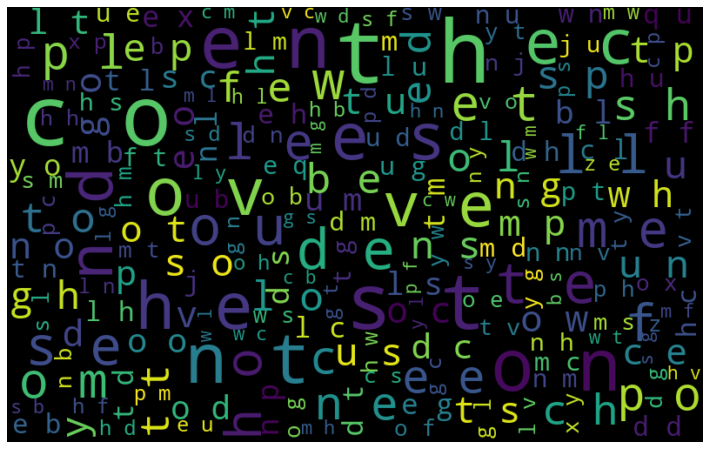

In [28]:
#display the frequent words
all_words=" ".join([sentence for sentence in df['clean_tweet']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [158]:
#extract the hasgtag
def hashtag_extract(tweets):
    hashtags=[]
    for words in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [159]:
ht=hashtag_extract(df['clean_tweet'])
ht[:5]

[[], [], [], [], []]